# Task 4.1: PCA Analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [53]:
import pandas as pd
from helper import *

from sklearn import preprocessing
from sklearn import decomposition

### Load data

In [77]:
# TODO: select sensors
sensors = ['L_T1', 'L_T2', 'S_PU5','F_PU6','S_PU6','F_PU7']

In [78]:
X_train_raw, y_train = load_dataset("../data/training1_no_incidents.csv")
X_test_raw, y_test   = load_dataset("../data/training2_with_incidents.csv")

# Scale to unit variance
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train_raw[sensors])
X_test = scaler.fit_transform(X_test_raw[sensors])

C:\Users\CodeSupply\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\CodeSupply\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Visualize

In [80]:
pca = decomposition.PCA(n_components=6)

# Fit training data
pca.fit(X_train)

# Transform training data
X_train_pca = pca.transform(X_train)

# Get variance explained
var_expl = pca.explained_variance_ratio_
cuml_var = var_expl.cumsum()

In [81]:
# TODO: plot (cumulatice) variance

In [82]:
# Calculate residuals
X_train_reconstruct = pca.inverse_transform(X_train_pca)
residuals = X_scaled - X_reconstruct

# Calculate (normalized) squared prediction error (error = norm/length of residuals)
error = np.linalg.norm(residuals, axis = 1) ** 2
error /= max(error)

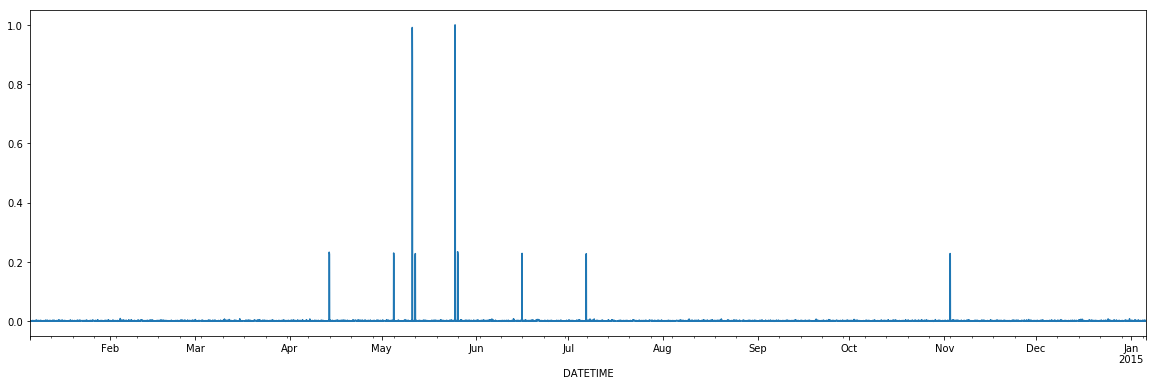

In [83]:
plt.figure(figsize=(20,6))
pd.Series(error, index=X_train_raw.index).plot()
plt.show()